In [1]:
from library import portfolio, utils, broker_funcs, config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbm.fbm import fbm
# price change is True
# updated weightData and alloc mechanic
assert config.changePrice == True
# print(config.changePrice)

In [2]:
print(config.config)

{'np': <module 'numpy' from '/home/braedyn/anaconda3/envs/mat36/lib/python3.6/site-packages/numpy/__init__.py'>, 'window': 500, 'changePrice': True, 'nportfs': 50, 'minPortfSize': 9, 'maxPortfSize': 12, 'overlapMin': 8, 'overlapMax': 10, 'tinit': 992, 'stockPool': './fbm/fbm100_2_14_july6.txt', 'hurstPool': './fbm/fbm100_2_14_july6_hurstpool.txt'}


In [3]:
ogstockPool = config.stockPool
oghurstPool = config.hurstPool

In [4]:
traderIDs = portfolio.portfGen()

transactions = pd.DataFrame()
totalOrders = pd.DataFrame()
broker = pd.DataFrame()

for t in range(993,2000):
    # 50 traders
    broker, totalOrders = broker_funcs.brokerage(traderIDs, t, broker, totalOrders)
    broker, transactions = broker_funcs.instantMatch(traderIDs, broker, transactions)
    print(t)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
sxnch
Optimal Sharpe:  0.3603080690007379
Initial Sharpe:  0.3603047588965186
hwzmy
Optimal Sharpe:  0.33738699874272265
Initial Sharpe:  0.3363572551358365
lkmio
Optimal Sharpe:  0.34254260154922106
Initial Sharpe:  0.34215069406667137
gcatl
Optimal Sharpe:  0.25819921174998434
Initial Sharpe:  0.2581984140529154
dkhjx
Optimal Sharpe:  0.24645871786261506
Initial Sharpe:  0.24597947467988418
jzqmy
Optimal Sharpe:  0.16397376204934638
Initial Sharpe:  0.16385791083908827
yutmd
Optimal Sharpe:  0.16754441389625807
Initial Sharpe:  0.1675403924721047
dbyep
Optimal Sharpe:  0.24459048627509747
Initial Sharpe:  0.2445879350826709
quwno
Optimal Sharpe:  0.25742418160748864
Initial Sharpe:  

/home/braedyn/Documents/singapore/library/broker_funcs.py:147: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  broker.set_value(sID, 'order', 0)


993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
11

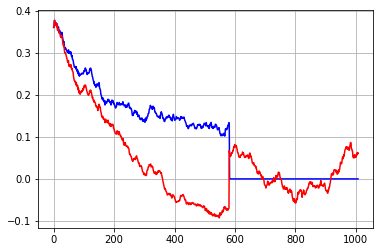

0.0


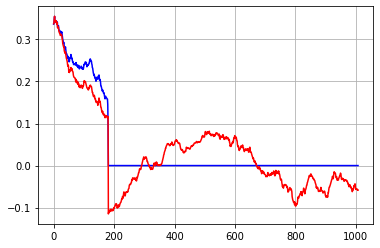

0.0


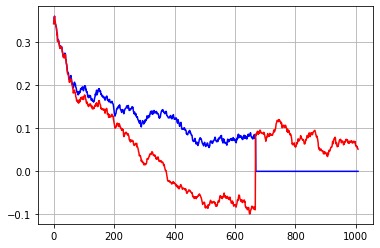

0.0


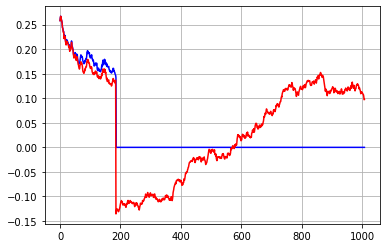

0.0


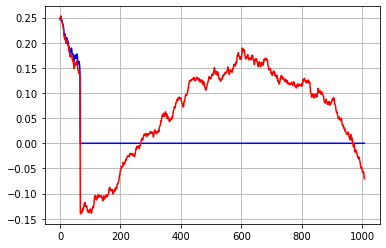

0.0


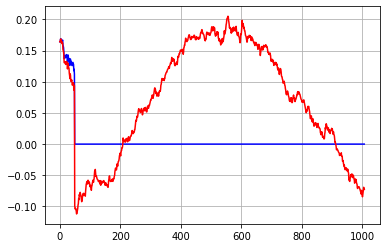

0.0


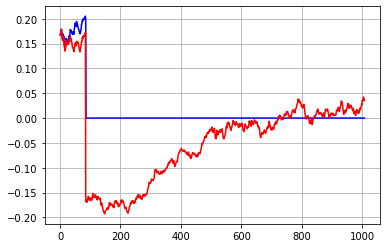

0.0


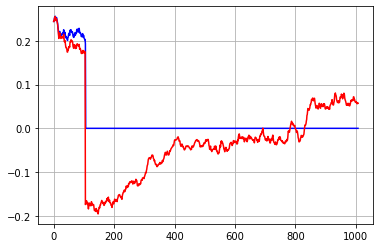

0.0


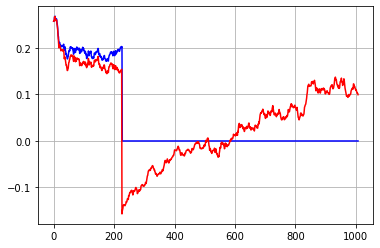

0.0


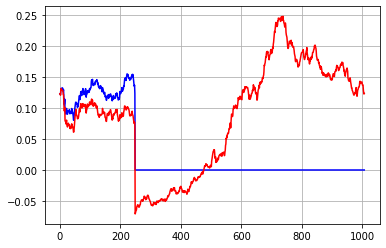

0.0


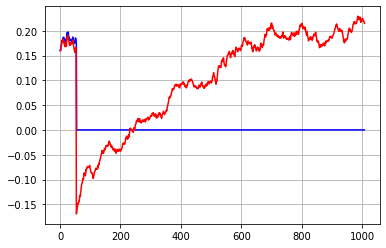

0.0


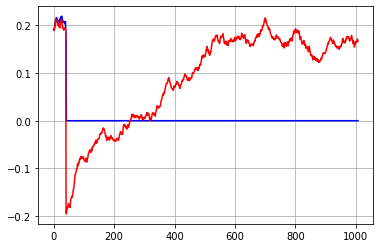

0.0


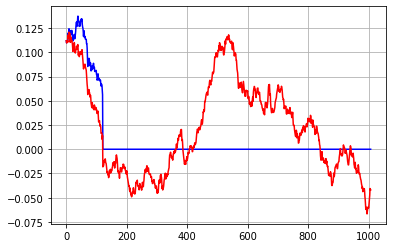

0.0


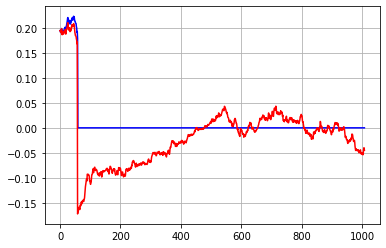

0.0


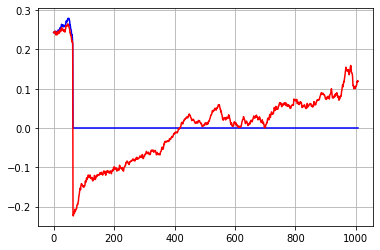

0.0


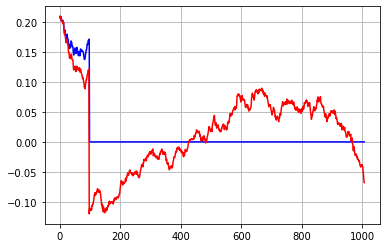

0.0


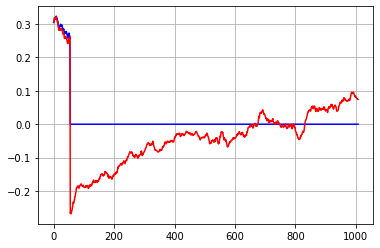

0.0


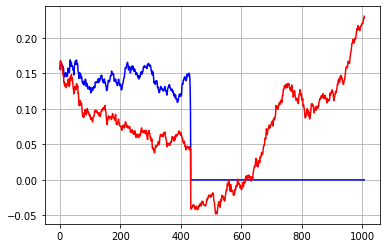

0.0


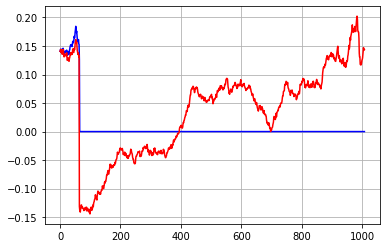

0.0


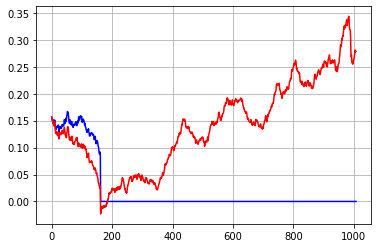

0.0


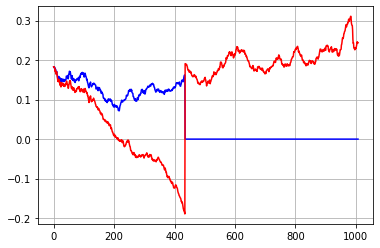

0.0


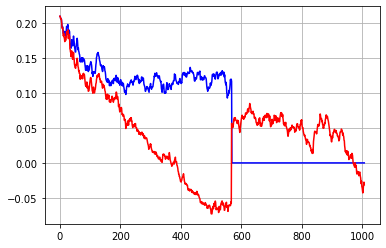

0.0


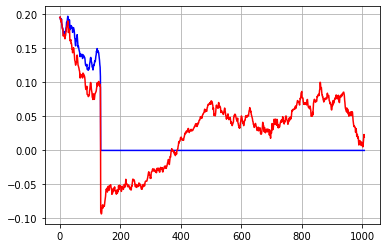

0.0


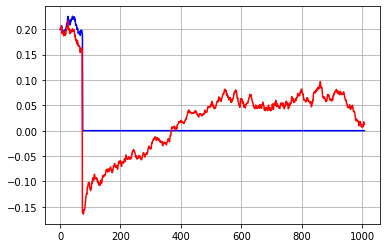

0.0


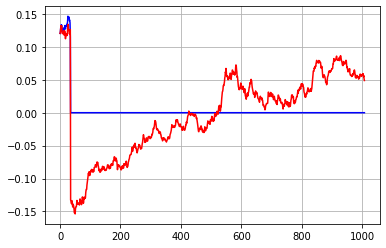

0.0


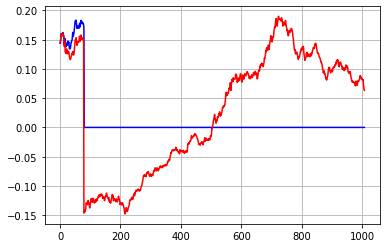

0.0


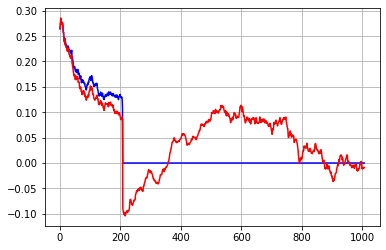

0.0


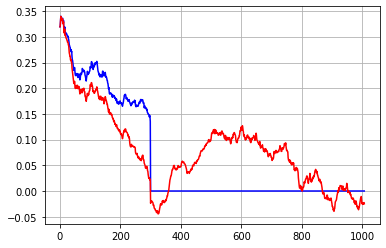

0.0


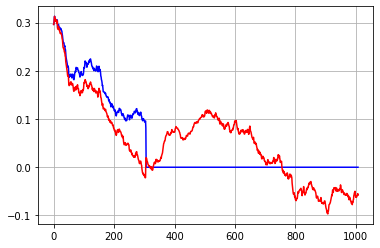

0.0


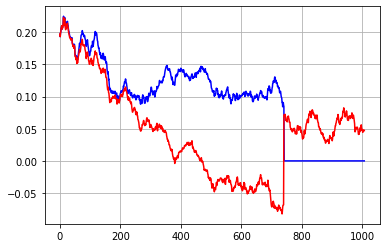

0.0


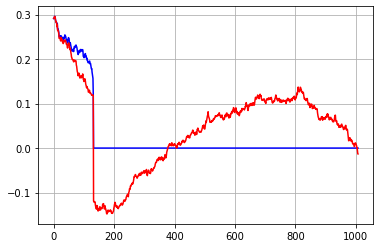

0.0


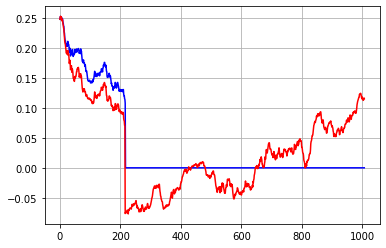

0.0


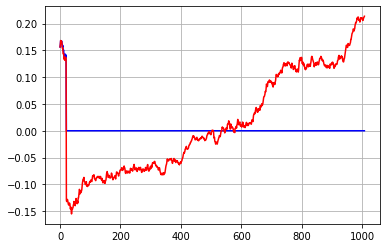

0.0


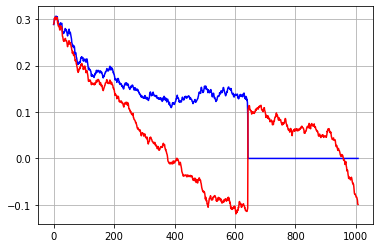

0.0


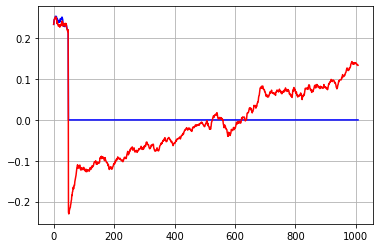

0.0


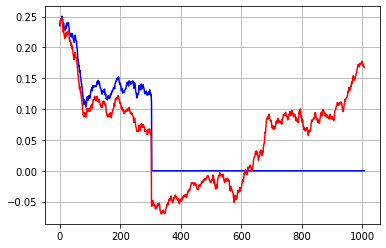

0.0


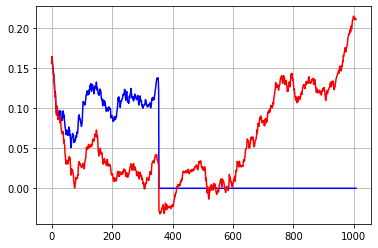

0.0


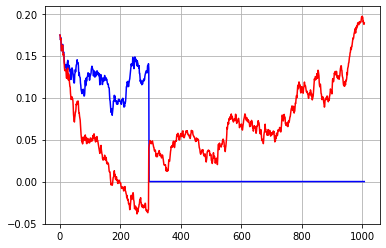

0.0


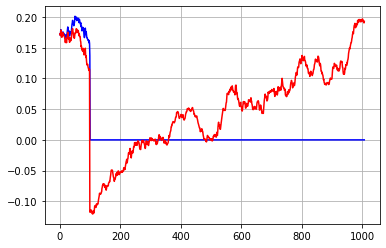

0.0


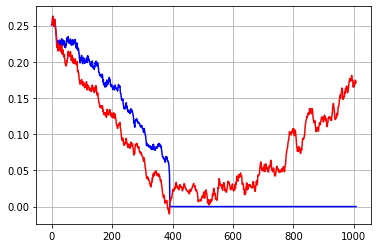

0.0


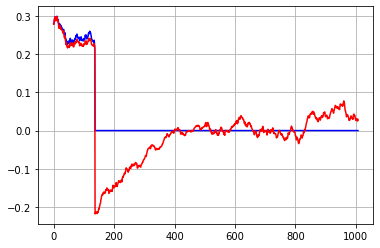

0.0


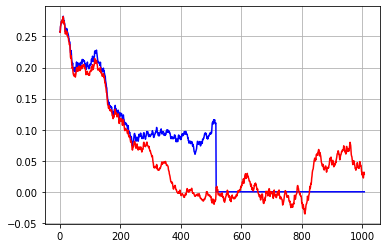

0.0


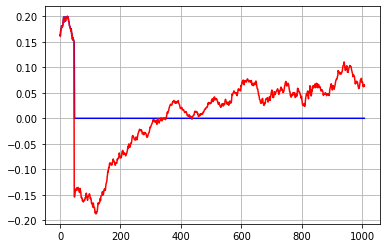

0.0


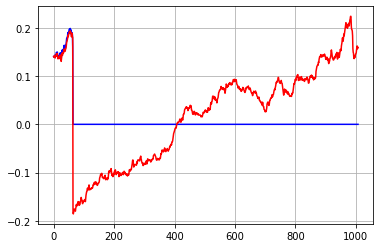

0.0


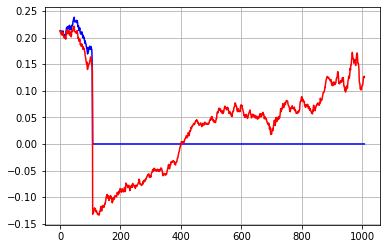

0.0


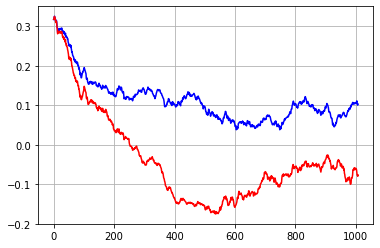

0.03781557650218275


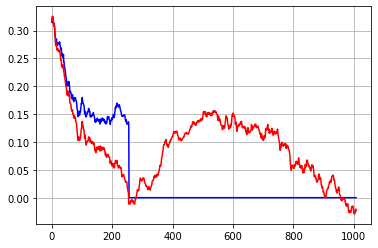

0.0


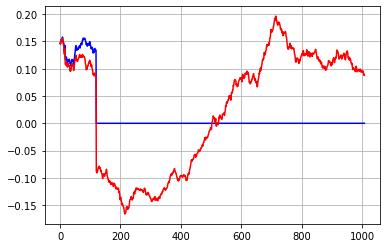

0.0


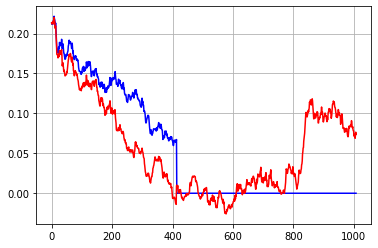

0.0


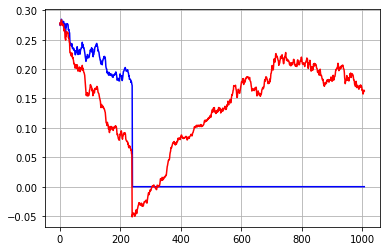

0.0


In [25]:
for i, portf in traderIDs.items():
#     plt.plot(np.arange(len(portf.value)),portf.value)
    plt.plot(np.arange(len(portf.sharpeReal)), portf.sharpeReal, color="blue")
#     plt.plot(np.arange(len(portf.sharpeOpt)), portf.sharpeOpt, color="green")
    plt.plot(np.arange(len(portf.sharpeNonOpt)), portf.sharpeNonOpt, color="red")
    plt.grid(True)
    plt.show()
    print(min(portf.sharpeReal))
# print(traderIDs['fgzra'].sharpeReal-traderIDs['fgzra'].sharpeNonOpt)

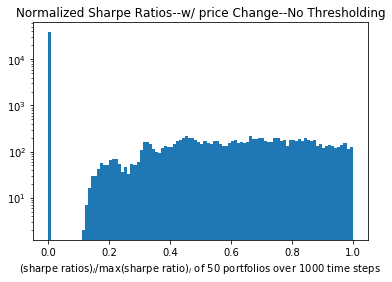

In [13]:
normSharpes=np.asarray([])
n = 0
for i, v in traderIDs.items():
    normSharpes = np.append(normSharpes,v.sharpeReal/max(v.sharpeReal))
    n += 1
plt.hist(normSharpes, bins =100)
plt.title("Normalized Sharpe Ratios--w/ price Change--No Thresholding")
plt.xlabel("(sharpe ratios)$_i$/max(sharpe ratio)$_i$ of 50 portfolios over 1000 time steps")
plt.yscale('log')
plt.savefig("./50 traders price change/priceChange_no_thresholding_50_normalized_sharperatios.png")

In [15]:
stockPool, hurstPool = portfolio.stockChars()

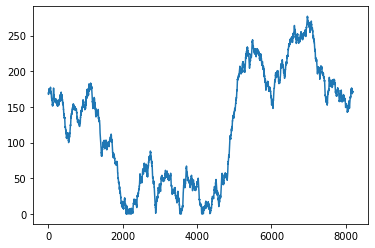

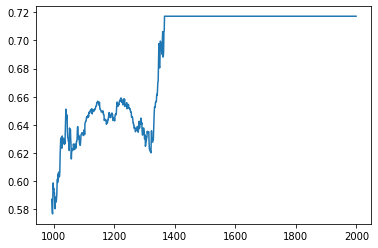

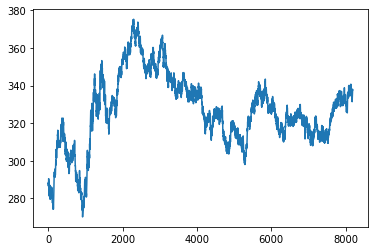

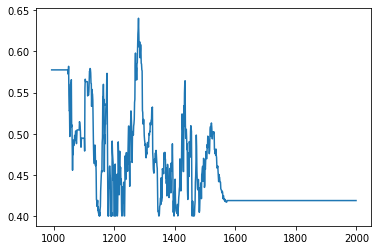

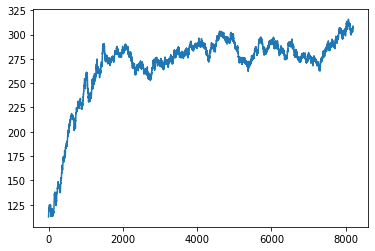

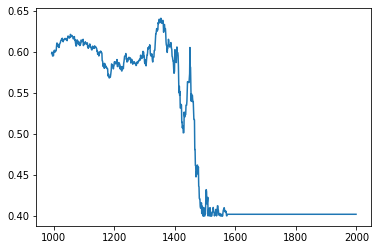

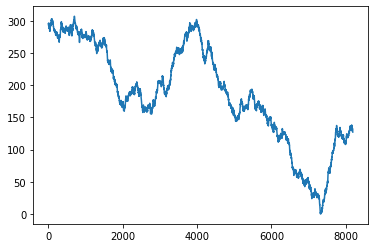

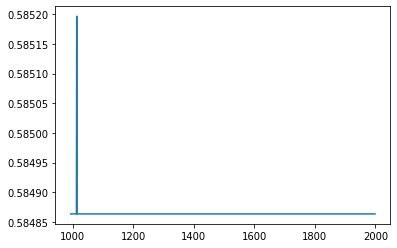

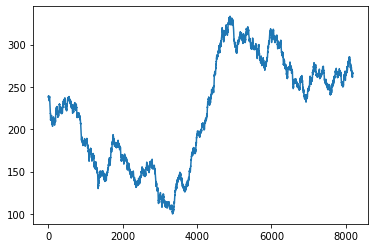

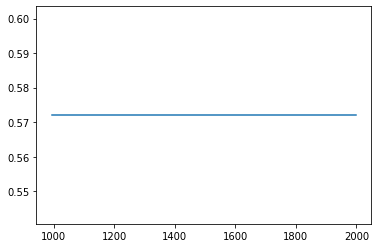

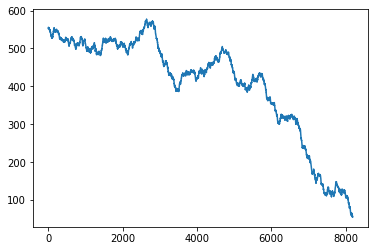

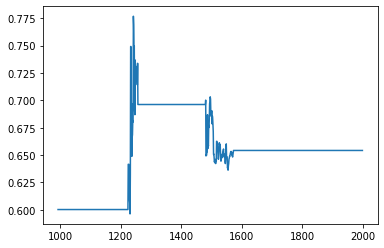

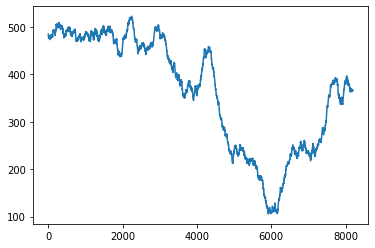

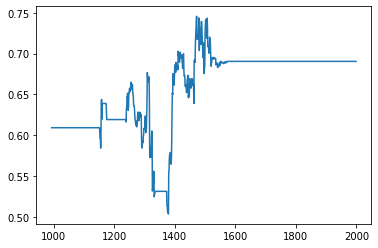

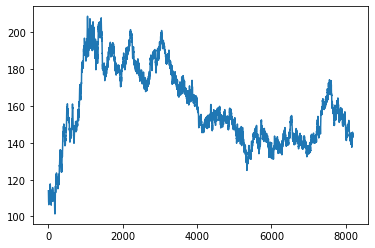

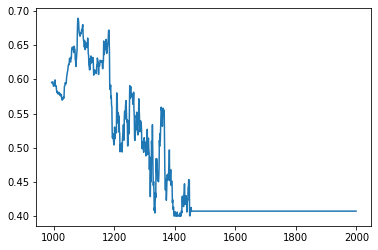

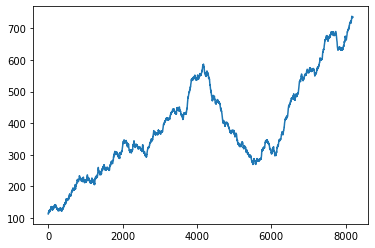

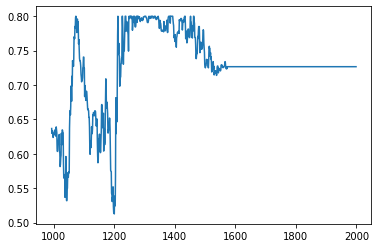

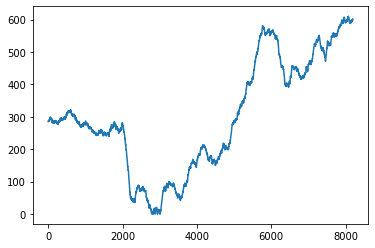

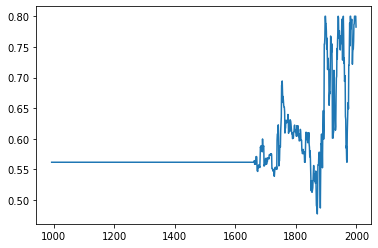

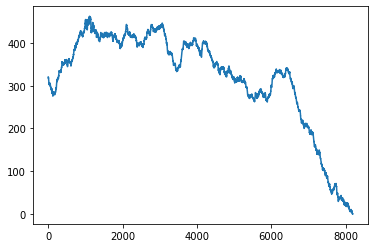

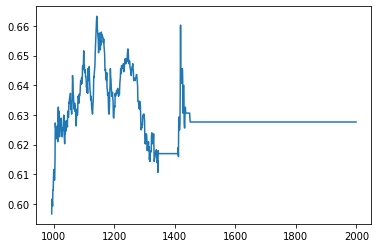

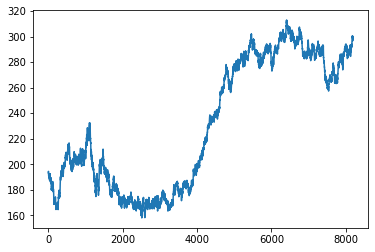

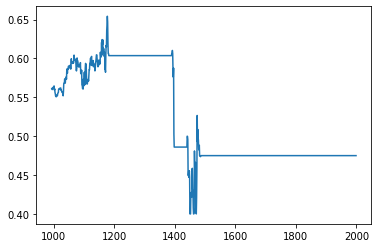

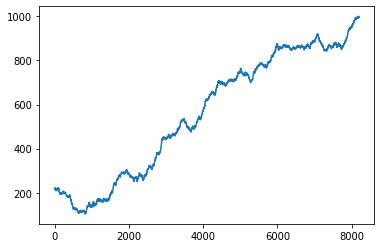

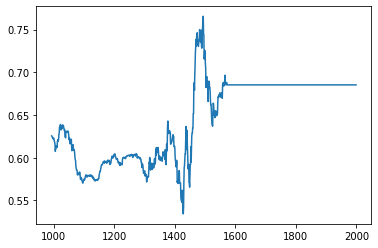

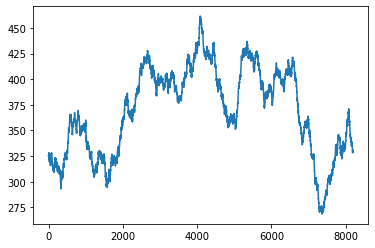

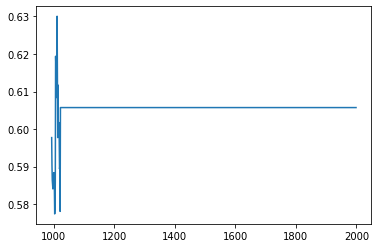

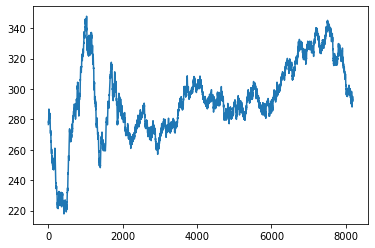

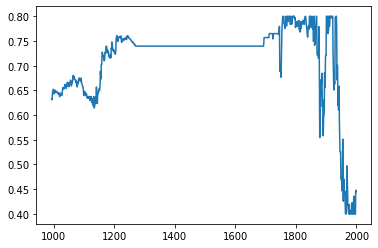

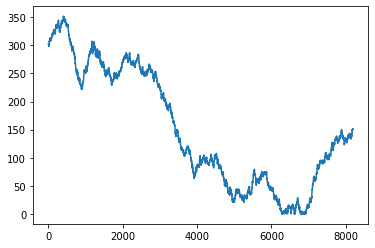

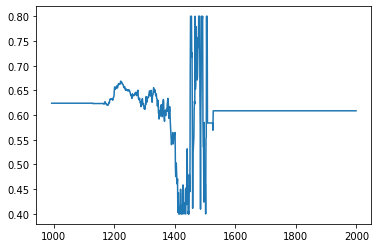

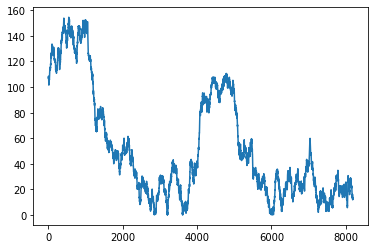

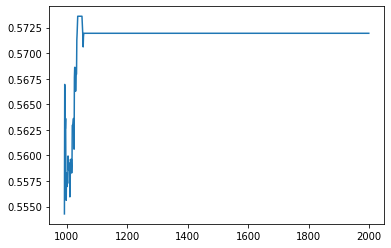

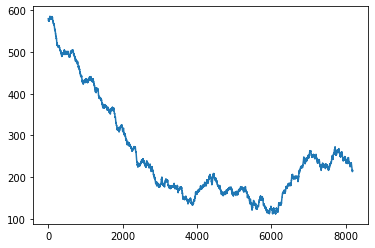

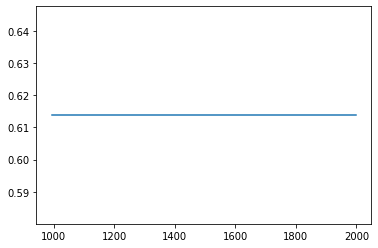

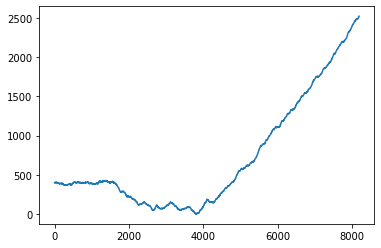

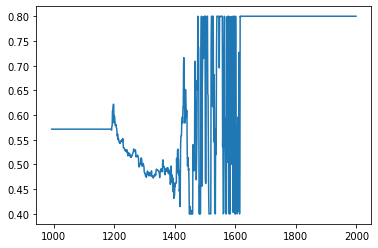

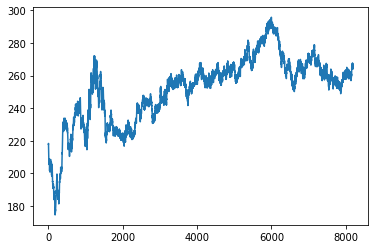

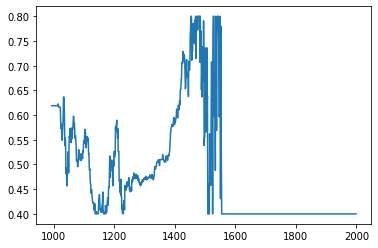

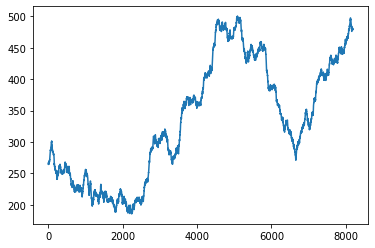

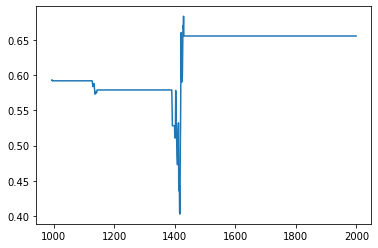

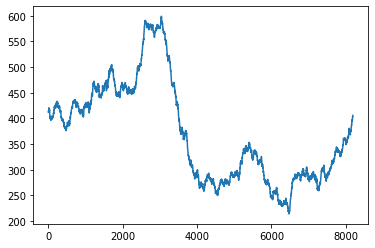

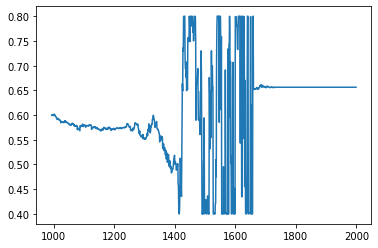

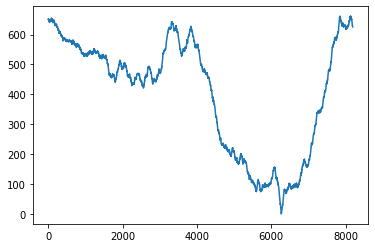

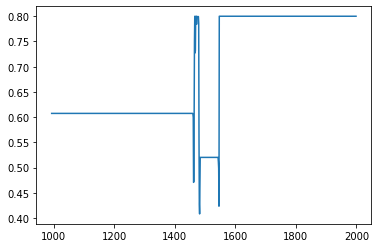

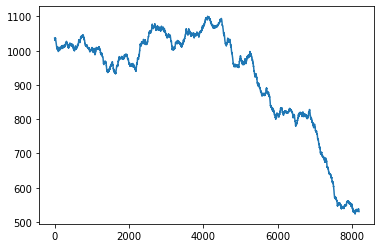

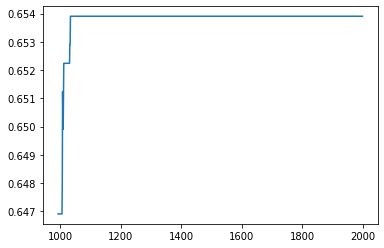

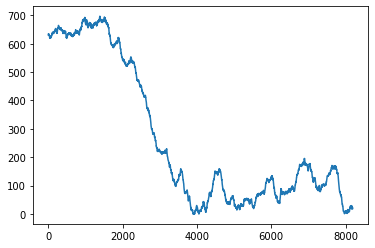

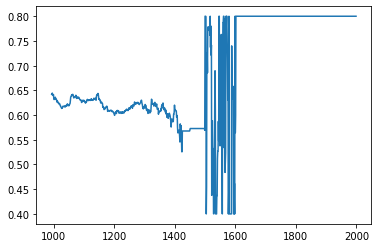

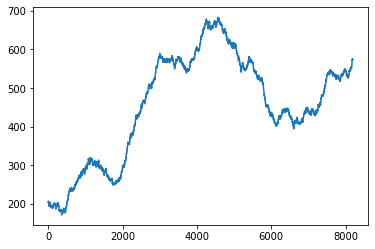

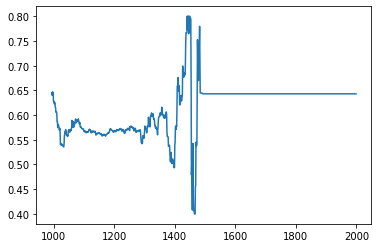

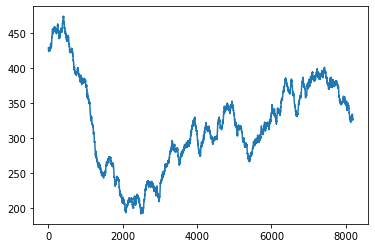

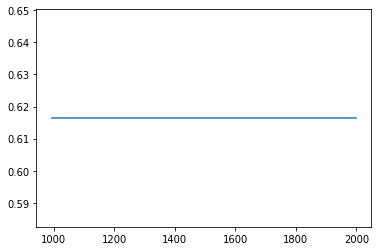

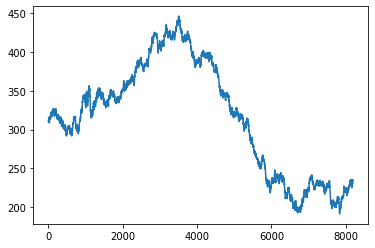

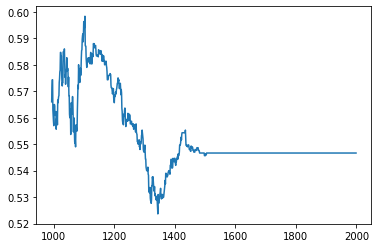

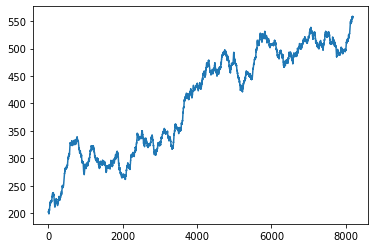

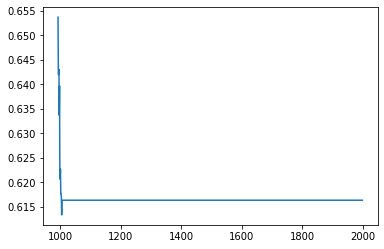

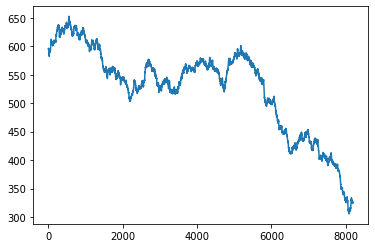

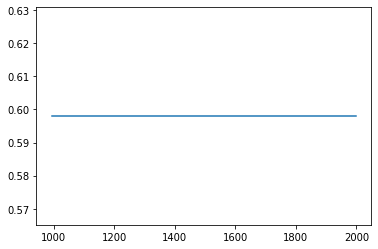

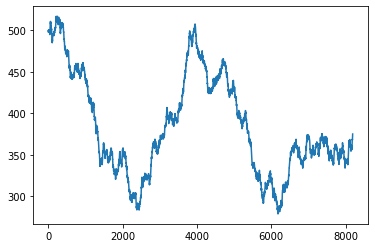

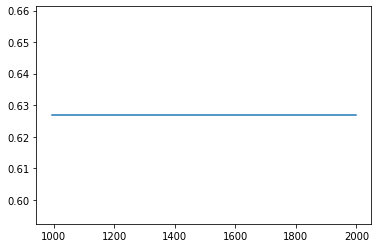

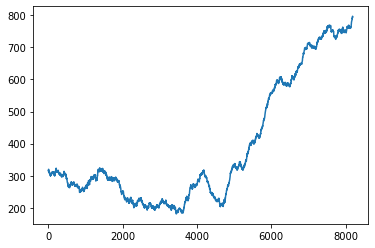

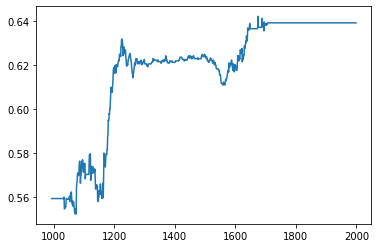

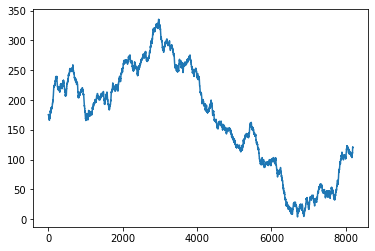

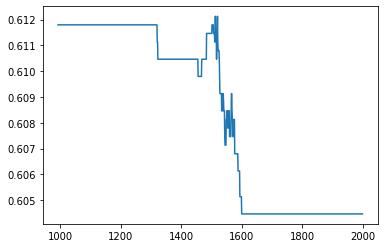

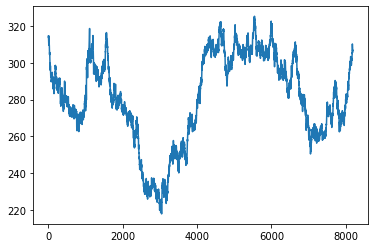

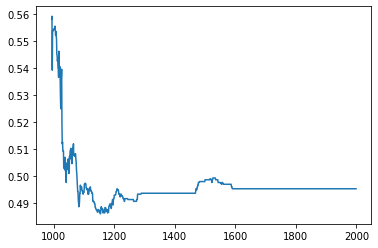

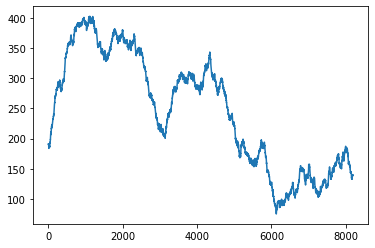

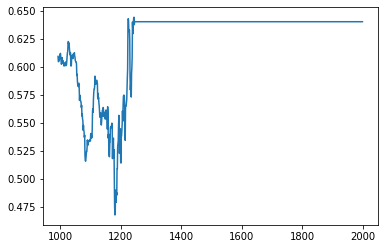

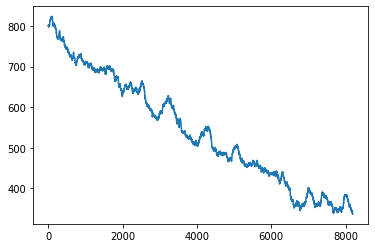

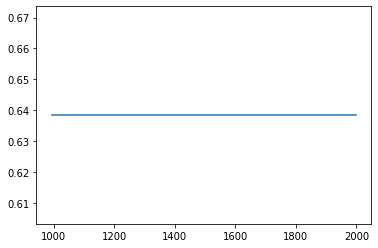

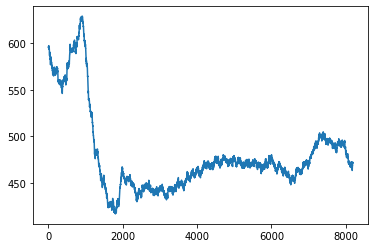

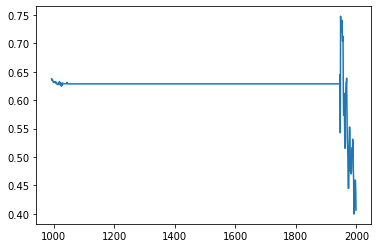

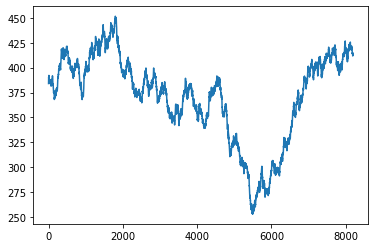

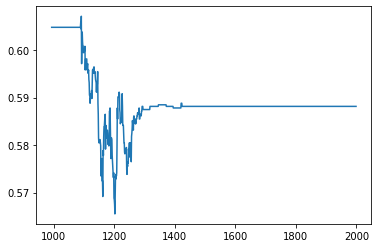

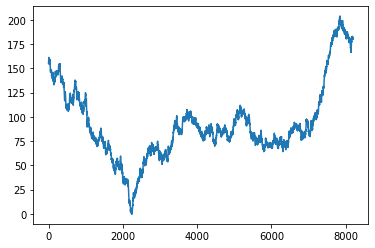

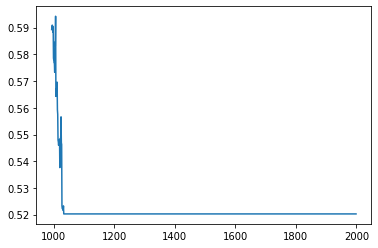

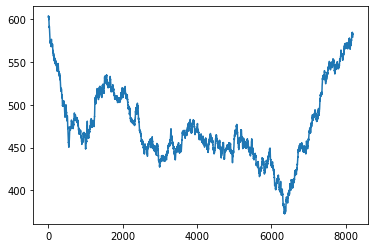

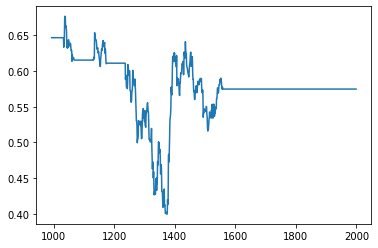

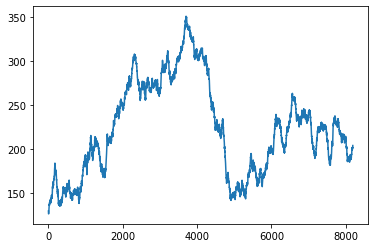

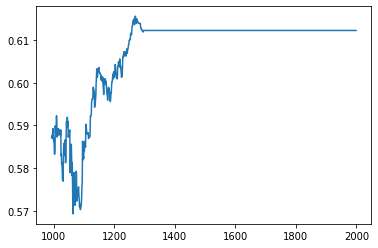

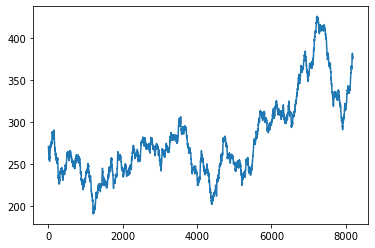

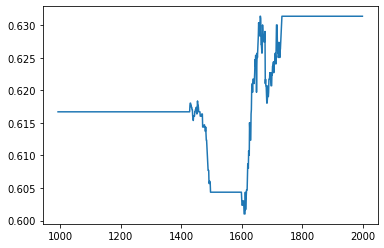

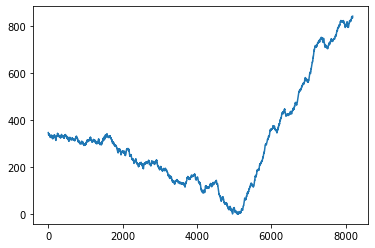

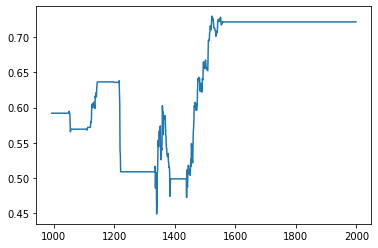

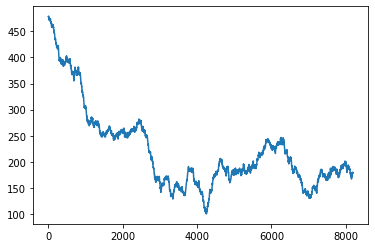

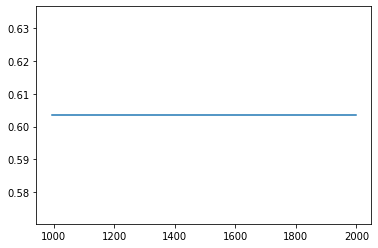

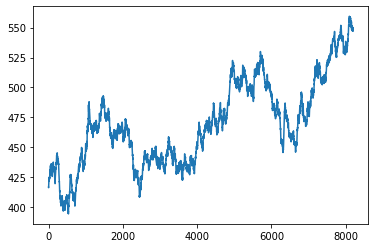

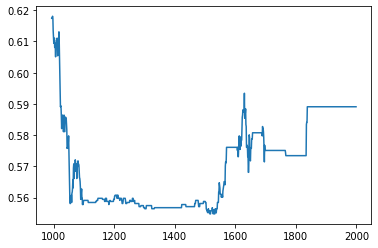

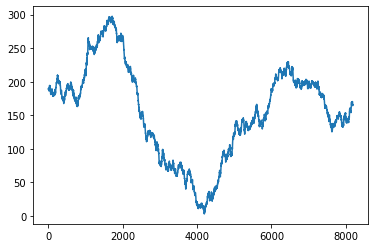

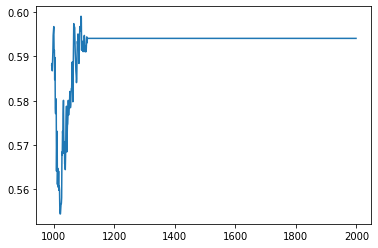

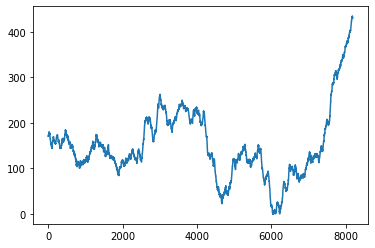

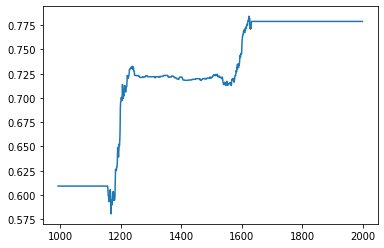

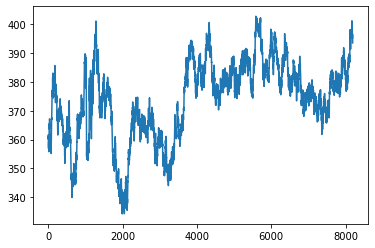

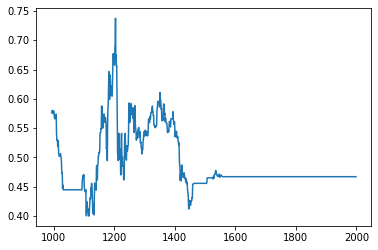

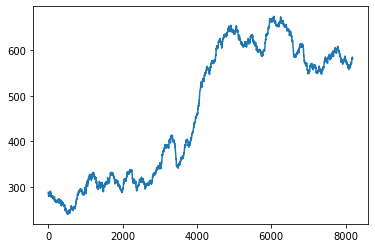

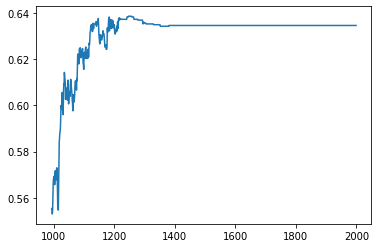

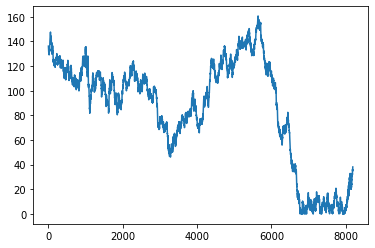

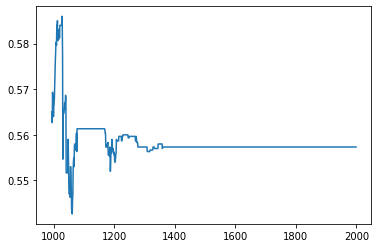

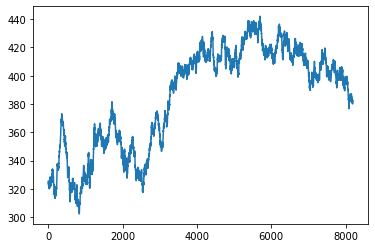

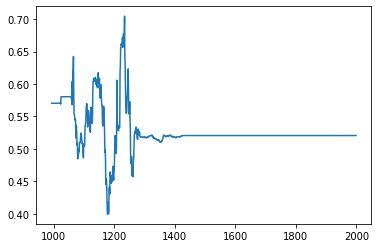

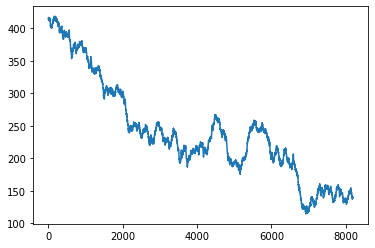

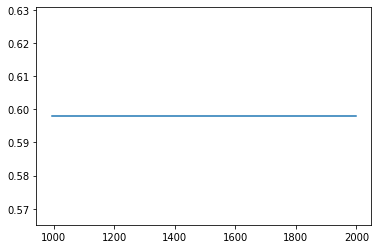

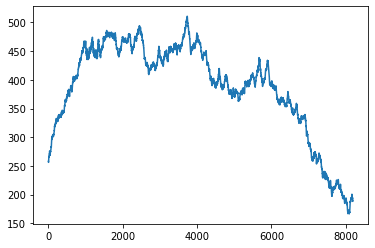

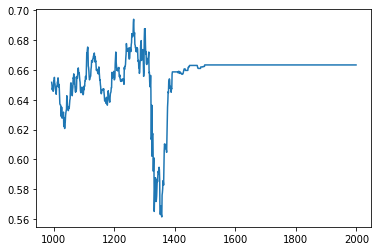

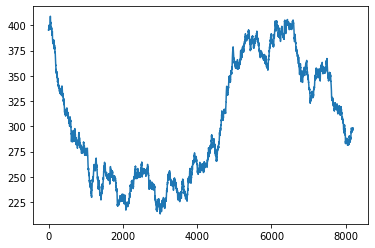

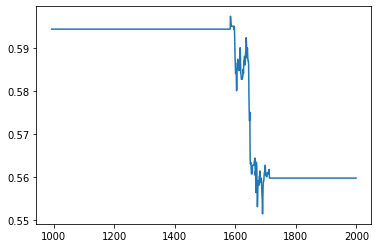

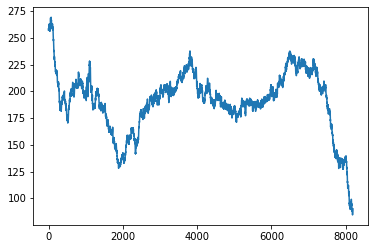

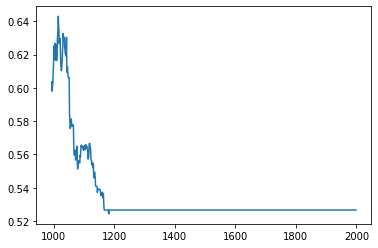

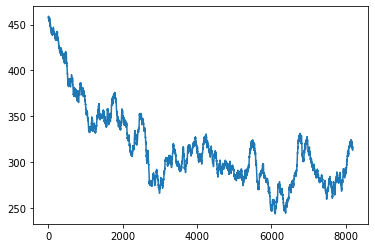

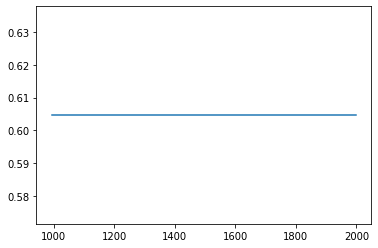

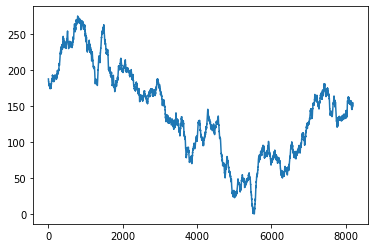

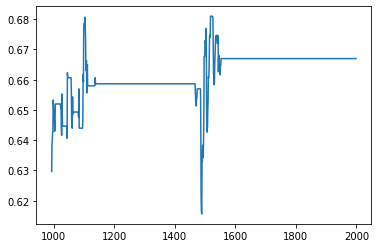

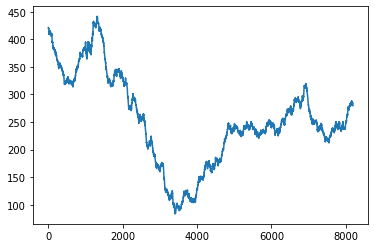

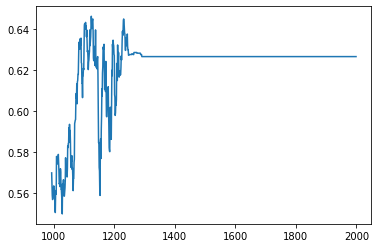

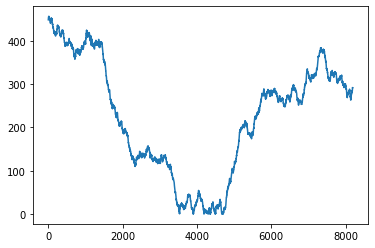

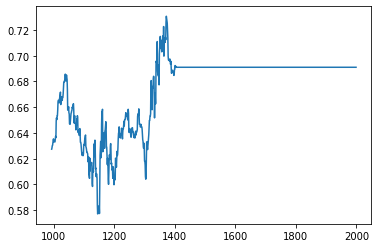

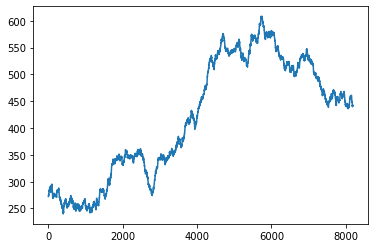

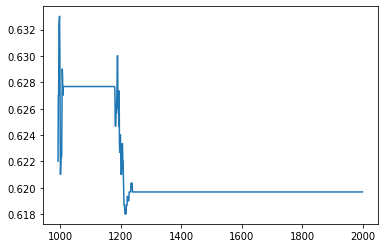

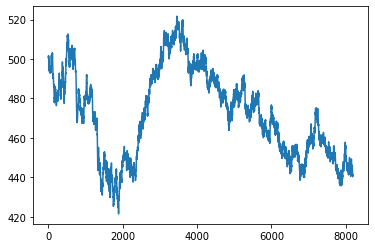

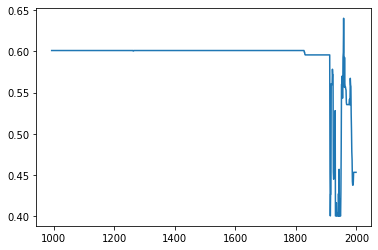

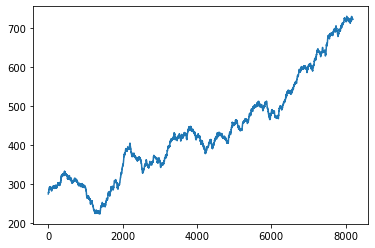

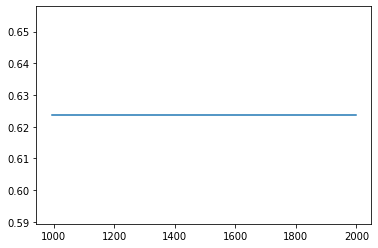

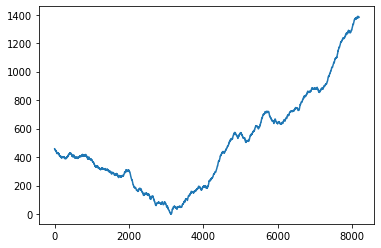

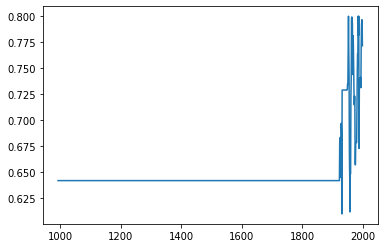

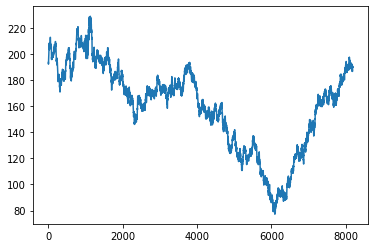

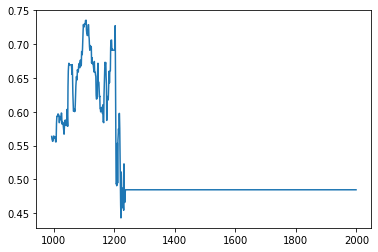

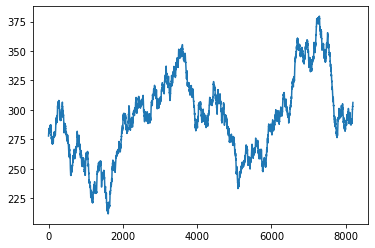

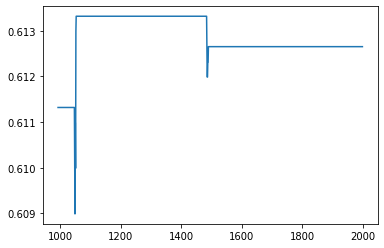

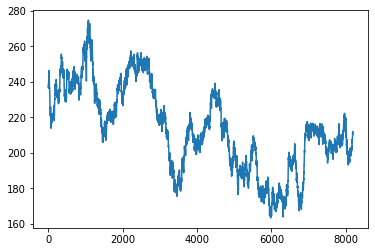

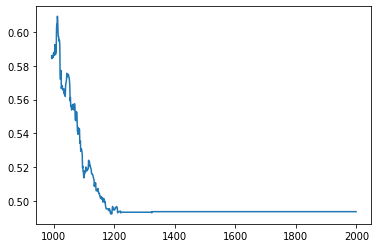

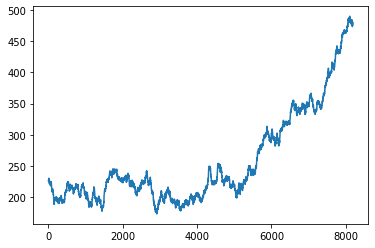

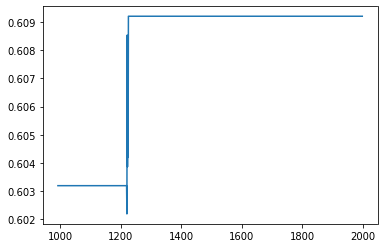

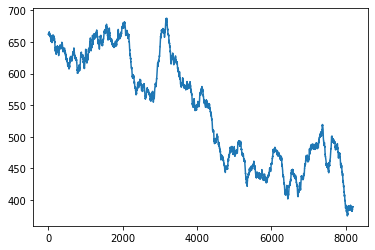

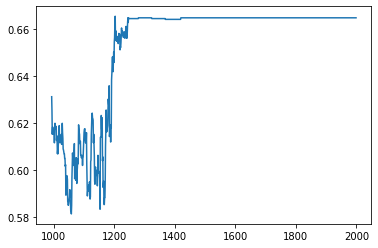

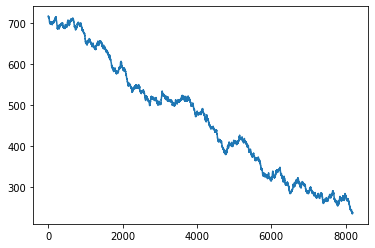

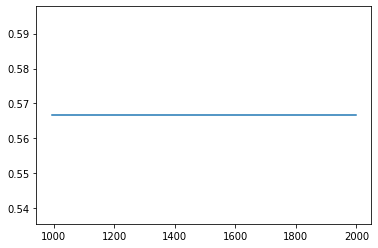

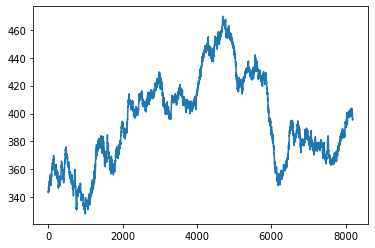

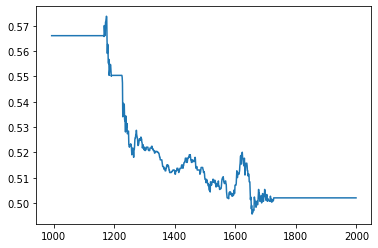

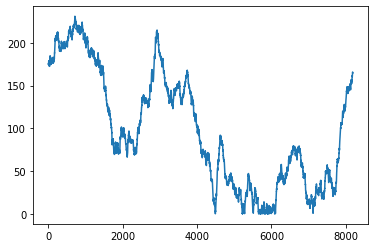

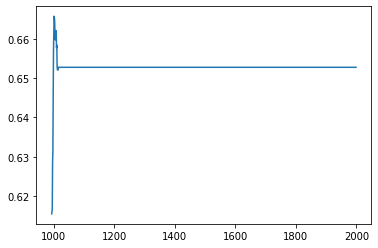

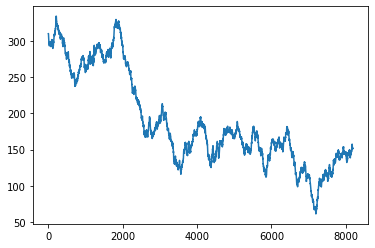

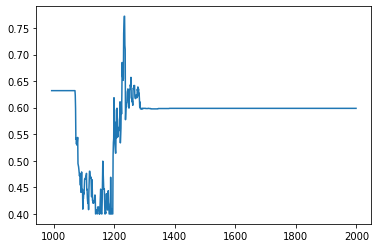

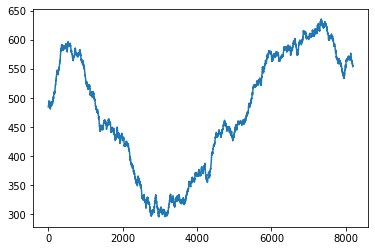

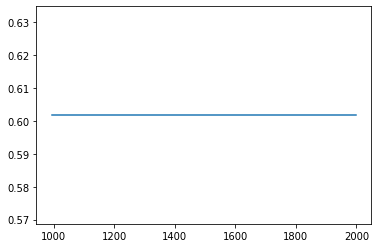

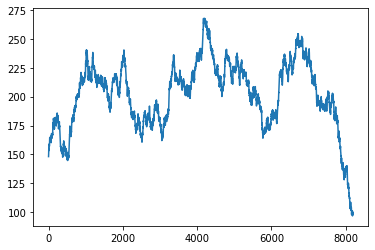

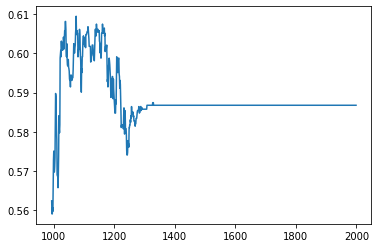

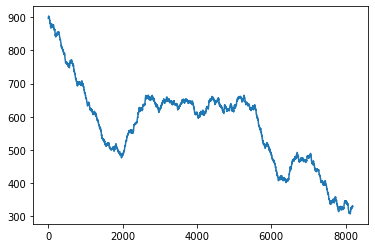

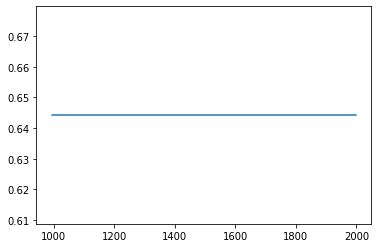

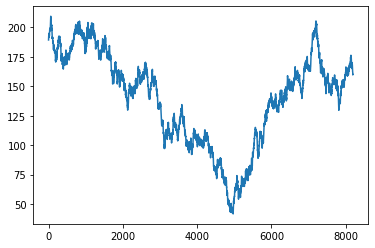

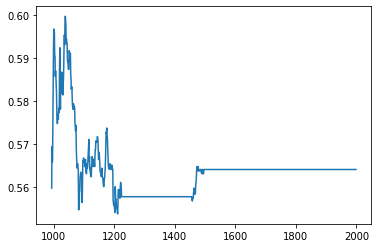

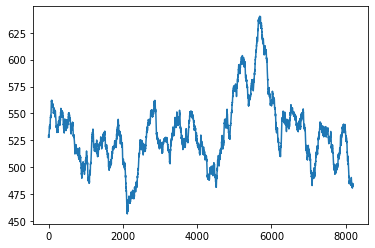

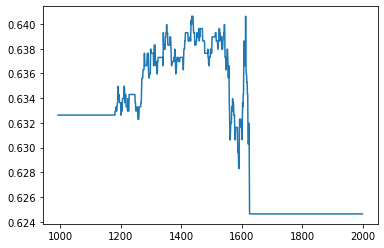

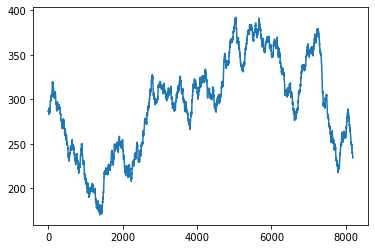

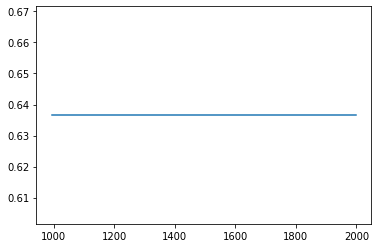

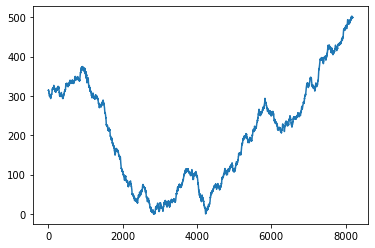

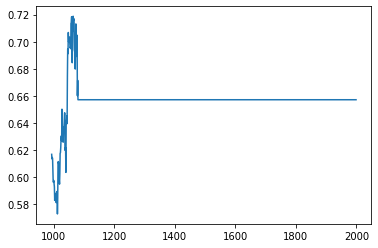

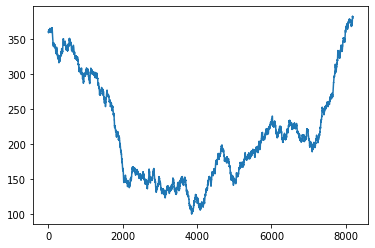

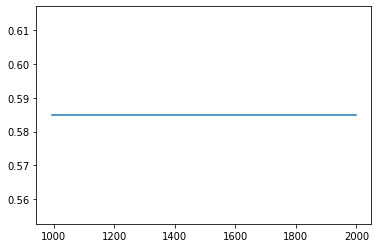

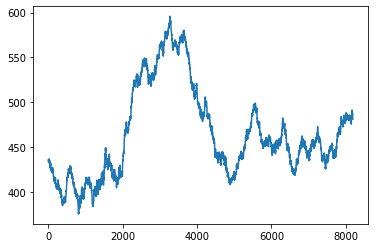

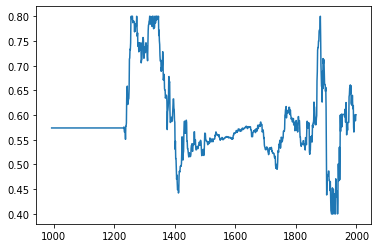

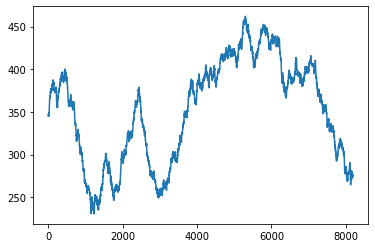

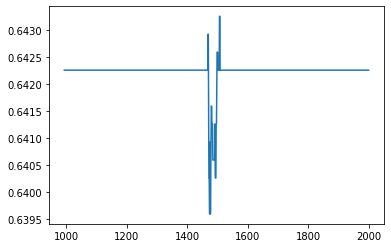

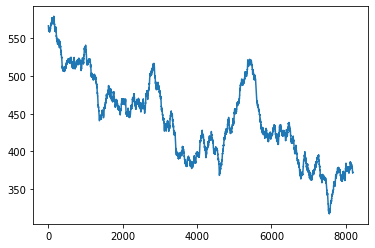

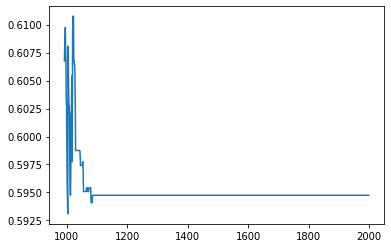

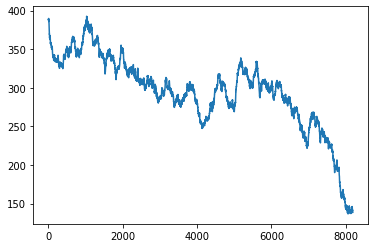

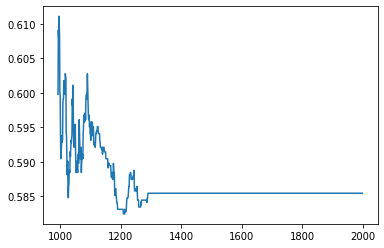

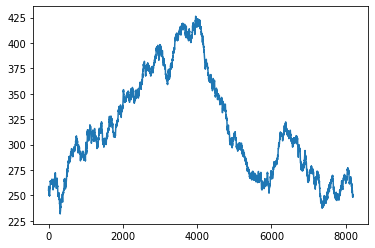

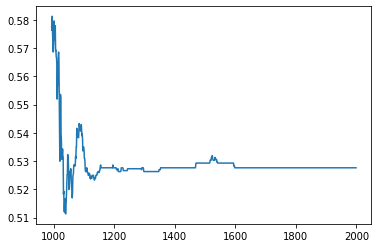

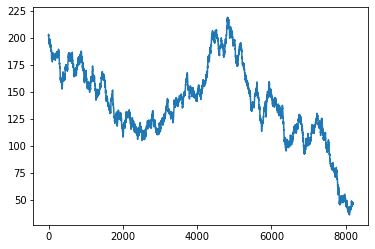

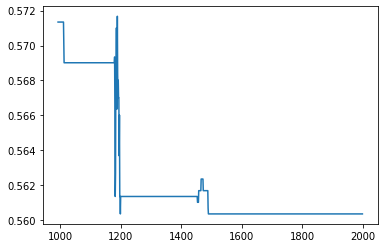

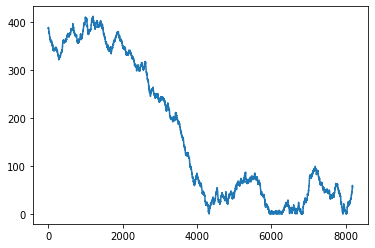

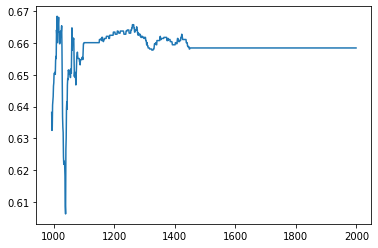

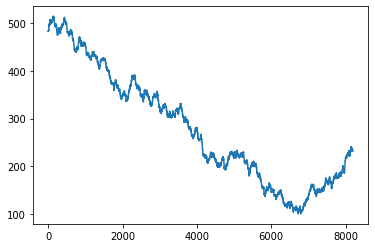

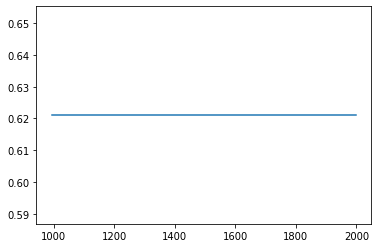

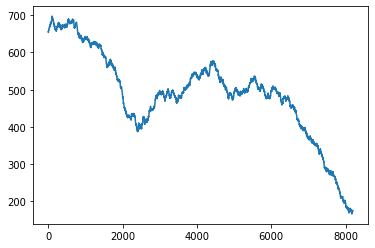

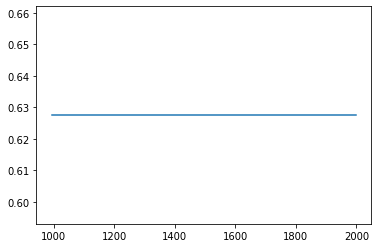

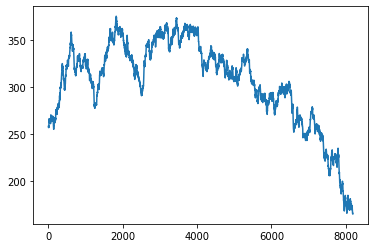

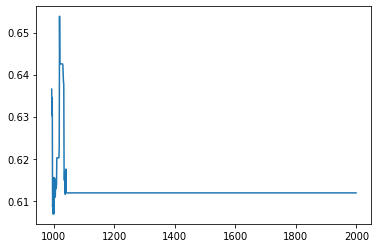

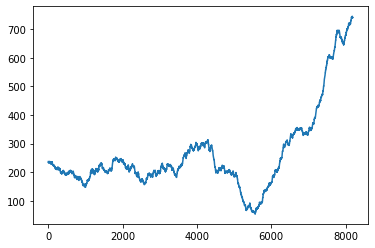

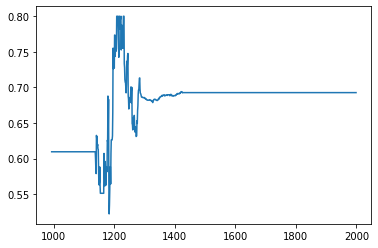

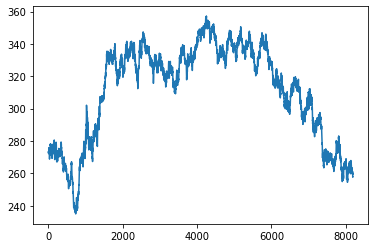

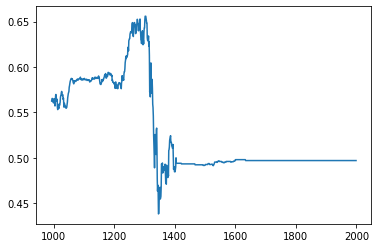

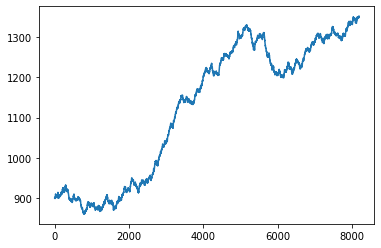

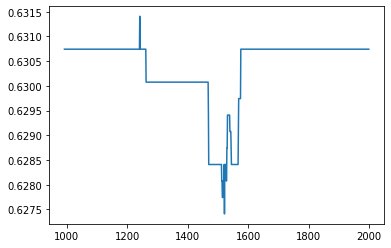

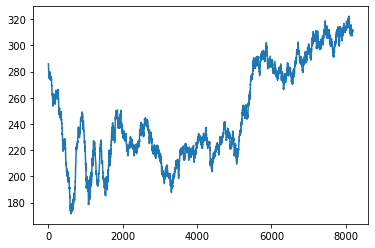

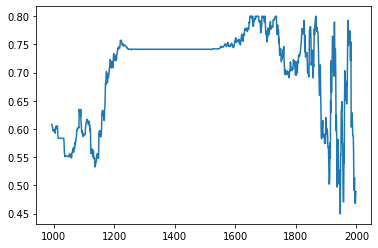

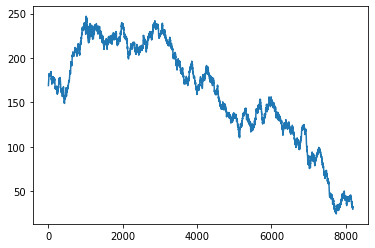

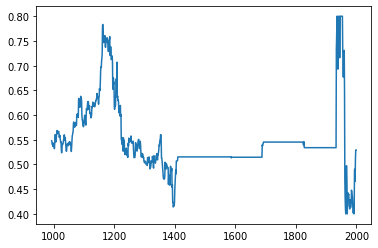

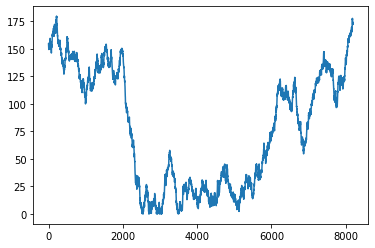

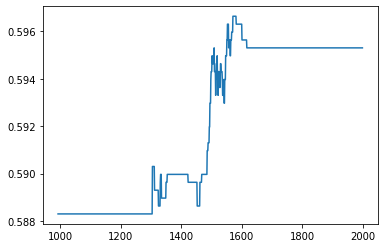

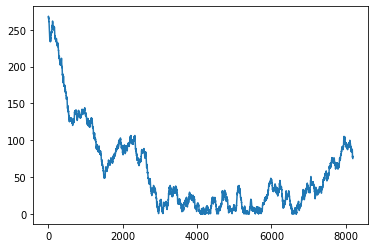

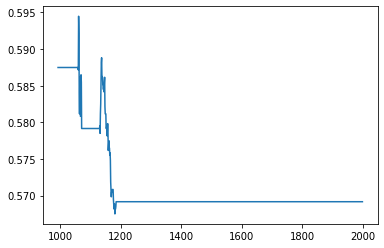

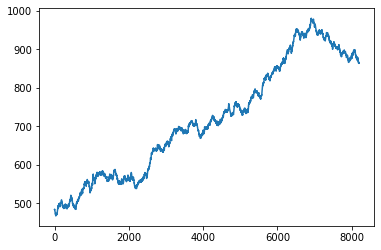

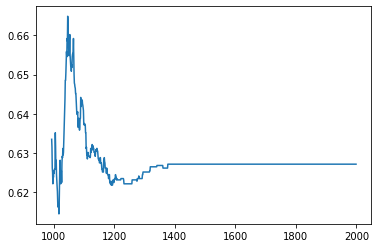

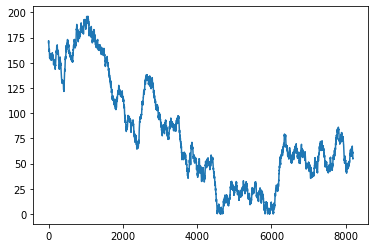

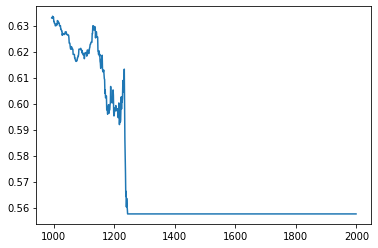

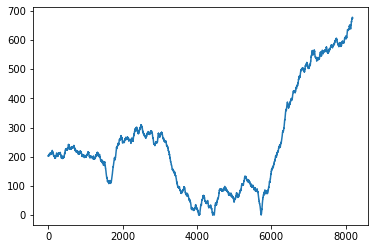

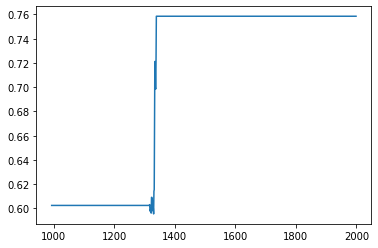

In [23]:
for i in range(len(stockPool)):
    plt.plot(np.arange(2**13+1),stockPool[i])
    plt.show()
    plt.plot(np.arange(993,2000),hurstPool[i,993:2000])
    plt.show()

In [ ]:
# stockChars = utils.characterize(stockPool,tmax=2000)

In [ ]:
Ttransactions = pd.DataFrame()
TtotalOrders = pd.DataFrame()
Tbroker = pd.DataFrame()

for key,portf in traderIDs.items():
    portf.reset(ptile=80)

for t in range(992,2000):
    Tbroker, TtotalOrders = broker_funcs.thresholdBrokerage(traderIDs, t, Tbroker, TtotalOrders)
    Tbroker, Ttransactions = broker_funcs.instantMatch(traderIDs, Tbroker, Ttransactions)
    print(t)

In [ ]:
TstockPool, ThurstPool = portfolio.stockChars()

In [ ]:
normSharpes=np.asarray([])
n = 0
for i, v in traderIDs.items():
    normSharpes = np.append(normSharpes,v.sharpeReal/max(v.sharpeReal))
    n += 1
plt.hist(normSharpes, bins =100)
plt.title("Normalized Sharpe Ratios--w/ price Change--w/ Thresholding")
plt.xlabel("(sharpe ratios)$_i$/max(sharpe ratio)$_i$ of 50 portfolios over 1000 time steps")
plt.savefig("priceChange_thresholding_100_normalized_sharperatios.png")

In [ ]:
import pickle

with open('./'+ 'traderIDs_50_pricechange' + '.pkl', 'wb') as f:
    pickle.dump(traderIDs, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# save totalORders totalTransaction stockPool hurstPool characterize

Text(0, 0.5, 'count')

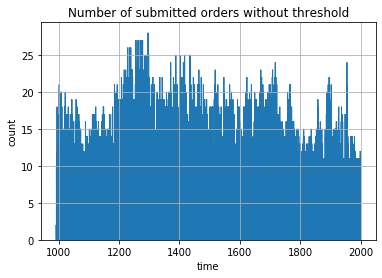

In [8]:
# totalOrders.sort_values(by=['time','portfolio'], inplace=True)
# totalOrders.reset_index(inplace=True,drop=True)
# totalOrders.hist(column='time',histtype='step',bins=7000)
# plt.title("Number of submitted orders without threshold")
# plt.xlabel("time")
# plt.ylabel("count")
# #plt.show()
# #plt.savefig("hurst001_unthresholded_totalorders")

Text(0, 0.5, 'count')

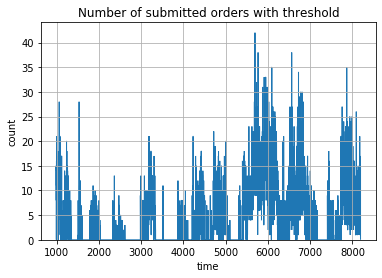

In [14]:
# TtotalOrders.sort_values(by=['time','portfolio'], inplace=True)
# TtotalOrders.reset_index(inplace=True,drop=True)
# TtotalOrders.hist(column='time',histtype='step',bins=7000)
# plt.title("Number of submitted orders with threshold")
# plt.xlabel("time")
# plt.ylabel("count")
# #plt.show()
# #plt.savefig("hurst001_thresholded_totalorders")

Text(0.5, 1.0, 'Hurst Index')

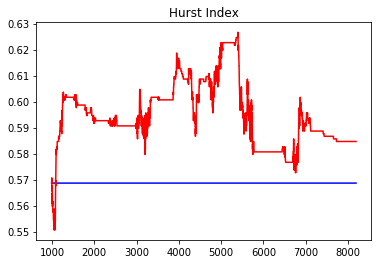

In [20]:
# a = 6 # random stock

# plt.plot(np.arange(992,8192), oghurstPool[a][992:8192], color = 'blue', label = "original H-index")
# plt.plot(np.arange(992,8192), ThurstPool[a][992:8192], color = 'red', label = "changing H-index")
# plt.title("Hurst Index")
# # plt.show()
# # plt.savefig('./hurst001_stock_'+str(a)+'_hurst.png')

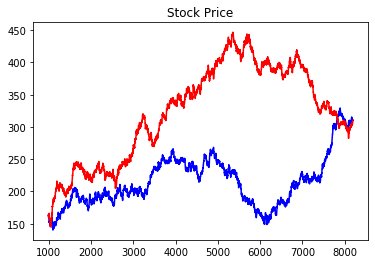

In [21]:
# plt.title("Stock Price")
# plt.plot(np.arange(992,8192), ogstockPool[a][992:8192], color = 'blue', label = "original H-index")
# plt.plot(np.arange(992,8192), TstockPool[a][992:8192], color = 'red', label = "changing H-index")
# #plt.show()
# # plt.savefig('./husrt001_stock_'+str(a)+'_stock.png')

In [22]:
# TstockChars = utils.characterize(TstockPool,tmax=8192)

In [29]:
# TstockChars.to_csv('TstockCharacteristics_7200_5p_20s.csv')
# TtotalOrders.to_csv('TtotalOrders_7200_5p_20s.csv')
# Ttransactions.to_csv('Ttransactions_7200_5p_20s.csv')
# np.savetxt('TstockPool_7200_5p_20s.txt', TstockPool)
# np.savetxt('ThurstPool_7200_5p_20s.txt', ThurstPool)

# traderIDs['bsfah'].weightdata

ID  time  stock  weight
0   bsfah   992      0    56.0
0   bsfah   992      1     0.0
0   bsfah   992      2    54.0
0   bsfah   992      3     0.0
0   bsfah   992      4     0.0
..    ...   ...    ...     ...
0   bsfah  8189      3     5.0
0   bsfah  8189      0    64.0
0   bsfah  8189     13    39.0
0   bsfah  8190     12    32.0
0   bsfah  8191     12    25.0

[17937 rows x 4 columns]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


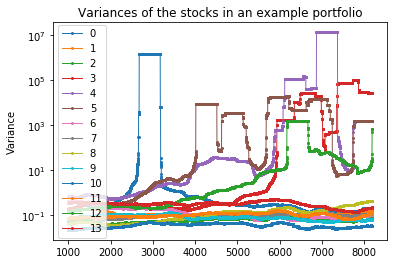

In [137]:
# qportOrders = TtotalOrders[(TtotalOrders['portfolio']=='bsfah')]
# qport = traderIDs['bsfah']
# print(qport.stocks)
# qportChars = TstockChars[TstockChars['stock'].isin(qport.stocks)]
# #qportChars[qportChars['time']==992]#['var'])

# # print(qportChars[qportChars['time']>7000])
# # plt.plot(np.arange(6000,8193),TstockPool[4][6000:])
# # plt.show()
# # print(qport.weightdata)
# for i in qport.stocks:
#     plt.plot(np.arange(992,8192),qportChars[qportChars['stock']==i]['var'], 'o-', label = str(i),markersize = 2, linewidth=1)
# plt.legend(loc='center left')
# plt.title("Variances of the stocks in an example portfolio")
# plt.ylabel("Variance")
# plt.yscale('log')
# plt.savefig("variances_of_an_exportf.png")
    

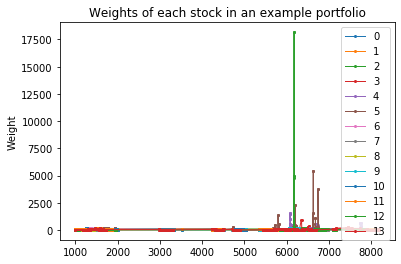

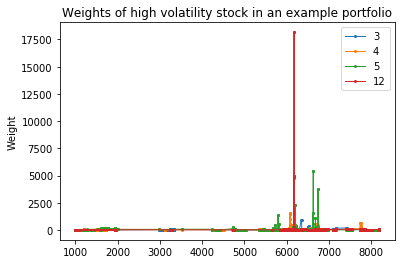

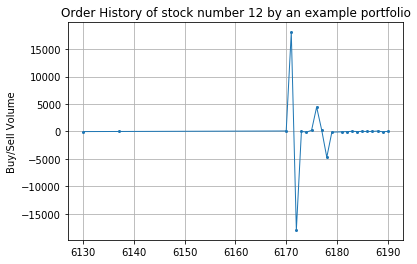

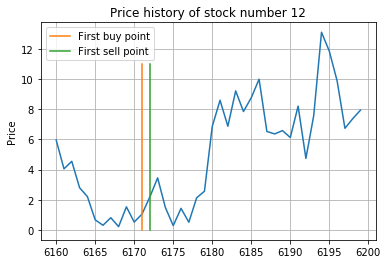

In [138]:
# # plot the weights of each stock
# #for stock in qport.stocks[:5]:
# for stock in qport.stocks:
#     plt.plot(qport.weightdata[qport.weightdata['stock']==stock]['time'],
#              qport.weightdata[qport.weightdata['stock']==stock]['weight'], 'o-',
#              label=str(stock), markersize = 2, linewidth=1)
# plt.title("Weights of each stock in an example portfolio")
# plt.legend()
# plt.ylabel("Weight")
# plt.savefig("Weights_of_ex_portf.png")
# plt.show()

# for stock in [3,4,5,12]:
#     plt.plot(qport.weightdata[qport.weightdata['stock']==stock]['time'],
#              qport.weightdata[qport.weightdata['stock']==stock]['weight'], 'o-',
#              label=str(stock), markersize = 2, linewidth=1)
# plt.title("Weights of high volatility stock in an example portfolio")
# plt.ylabel("Weight")
# plt.legend()
# plt.savefig("Weights_special_of_ex_portf.png")
# plt.show()

# plt.plot(np.asarray(qportOrders[qportOrders['stock']==12].time)[258:280],np.asarray(qportOrders[qportOrders['stock']==12].order)[258:280], 'o-', markersize=2, linewidth=1)
# plt.grid('on')
# plt.title("Order History of stock number 12 by an example portfolio")
# plt.ylabel("Buy/Sell Volume")
# plt.savefig("Orders_of_volatilestock_of_ex_portf.png")
# plt.show()

# plt.plot(np.arange(6160,6200),TstockPool[12][6160:6200])
# plt.plot(np.repeat([6171],12),np.arange(0,12), label = "First buy point")
# plt.plot(np.repeat([6172],12),np.arange(0,12), label = "First sell point")
# plt.legend()
# plt.title("Price history of stock number 12")
# plt.ylabel("Price")
# plt.grid('on')
# plt.savefig("Price_of_volatilestock_of_ex_portf.png")
# plt.show()

In [127]:
# qportOrders[qportOrders['stock']==12].order.idxmin()
# qportOrders[qportOrders['stock']==12].loc[17894]

time          6172
portfolio    bsfah
stock           12
order       -17954
Name: 17894, dtype: object

# Vargaps function on qportChars
### Integrate with weight data

In [60]:
vargaps = np.asarray([])
avgreturn = np.asarray([])
avgvar = np.asarray([])
stdgaps = np.asarray([])
avgstd = np.asarray([])
for t in range(992,8192):
    vargaps = np.append(vargaps,max(qportChars[qportChars['time']==t]['var'])-min(qportChars[qportChars['time']==t]['var']))
    avgreturn = np.append(avgreturn, np.mean((qportChars[qportChars['time']==t]['mean'])))
    avgvar = np.append(avgvar, np.mean((qportChars[qportChars['time']==t]['var'])))
    stdgaps = np.append(stdgaps,max(qportChars[qportChars['time']==t]['std'])-min(qportChars[qportChars['time']==t]['std']))
    avgstd = np.append(avgstd, np.mean((qportChars[qportChars['time']==t]['std'])))
                        

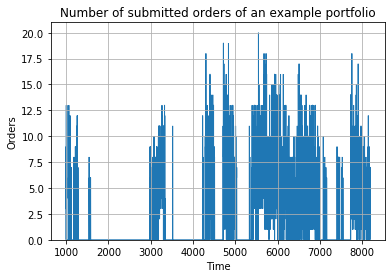

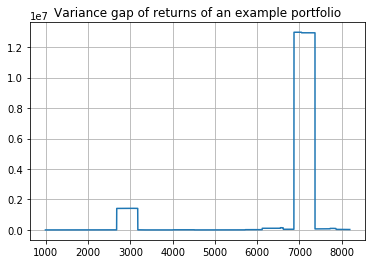

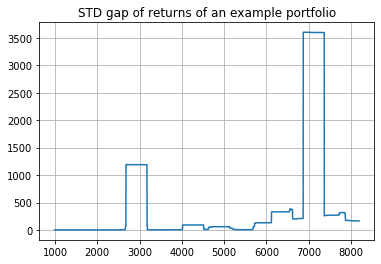

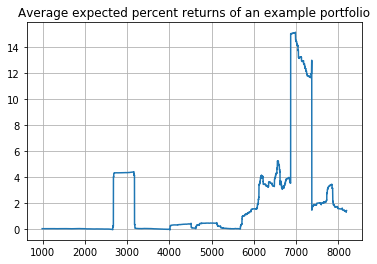

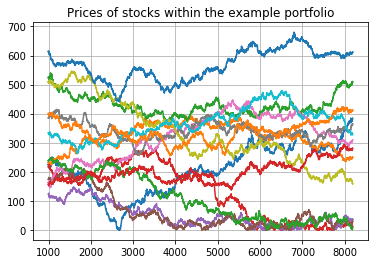

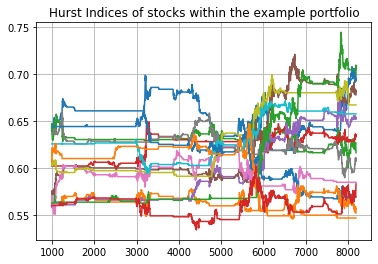

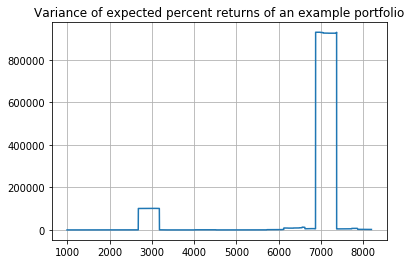

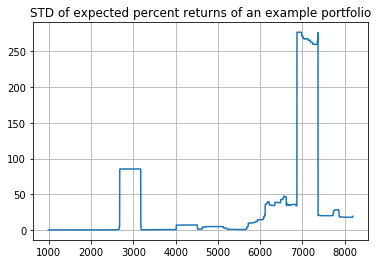

In [84]:
# qportOrders.hist(column='time',histtype='step',bins=6000)
# plt.title("Number of submitted orders of an example portfolio")
# plt.xlabel("Time")
# plt.ylabel("Orders")
# plt.savefig("hstep_001_7200_thresholded_submittedOrders.png")
# plt.show()


# plt.plot(np.arange(992,8192),vargaps)
# plt.grid(True)
# plt.title("Variance gap of returns of an example portfolio")
# plt.savefig("hstep_001_7200_thresholded_variancegap.png")
# plt.show()

# plt.plot(np.arange(992,8192),stdgaps)
# plt.grid(True)
# plt.title("STD gap of returns of an example portfolio")
# plt.savefig("hstep_001_7200_thresholded_stdgap.png")
# plt.show()

# plt.title("Average expected percent returns of an example portfolio")
# plt.grid(True)
# plt.plot(np.arange(992,8192),avgreturn)
# plt.savefig("hstep_001_7200_thresholded_averagereturns.png")
# plt.show()


# for i in qport.stocks:
#     plt.plot(np.arange(992,8192),TstockPool[i][992:8192])
# plt.grid(True)
# plt.title("Prices of stocks within the example portfolio")
# plt.savefig("hstep_001_7200_thresholded_pricesexportf.png")
# plt.show()


# for i in qport.stocks:
#     plt.plot(np.arange(992,8192),ThurstPool[i][992:8192])
# plt.grid(True)
# plt.title("Hurst Indices of stocks within the example portfolio")
# plt.savefig("hstep_001_7200_thresholded_hurstexportf.png")
# plt.show()


# plt.title("Variance of expected percent returns of an example portfolio")
# plt.grid(True)
# plt.plot(np.arange(992,8192),avgvar)
# plt.savefig("hstep_001_7200_thresholded_variancereturns.png")
# plt.show()

# plt.title("STD of expected percent returns of an example portfolio")
# plt.grid(True)
# plt.plot(np.arange(992,8192),avgstd)
# plt.savefig("hstep_001_7200_thresholded_stdreturns.png")

In [ ]:
# # for key,portf in traderIDs.items():
# #     print(portf.stocks)
# from library.utils import sigmoid
# k = 100
# plt.title("85th Ptile ("+str(qport.threshold)+") with k slope: "+ str(k))
# pts = np.linspace(0.1,0.17,2000)
# plt.grid(True)
# plt.plot(pts,sigmoid(pts,qport.threshold, k = k))
# # plt.savefig("85th percentile sigmoid function with slope "+str(k))

In [ ]:
# plt.hist(qport.sharpe, bins=30)
# plt.grid(True)
# plt.title("Distribution of all sharpe ratios in example portfolio before thresholding")
# # plt.savefig("h001_sharpedistthresholded")

In [ ]:
# for name,portf in traderIDs.items():
#     p90 = (np.percentile(portf.sharpe,50))
#     p100 = (max(portf.sharpe))
#     x0 = (p100+p90)/2
#     probs = []
#     print(x0)
#     for i in portf.sharpe:
#         p = (sigmoid(i,x0, k =1))
#         probs.append(p)
#     #print(probs)
#     plt.plot(portf.sharpe,probs, 'o')
#     plt.grid('on')
#     plt.show()
# # june 18, create a reset function in the portfolios to incorporate sharpe ratio threshold
# # reset the sharpe ratio counter for the portfolios and update the order function

# Overlap portfolio
might be better to just choose randomly so theres no disconnect in the selection..

In [ ]:
# import string 
# import random 
# def randString(length = 5):
#     letters = string.ascii_lowercase
#     return ''.join(random.sample(letters,length))

# tstocks = {}
# stocks = np.arange(50)
# window = 5
# indx = 0
# portfs=0
# print(stocks)
# while portfs <= 100:
#     startpos = indx % len(stocks)
#     window = np.random.randint(12,18)
#     name = randString()
#     print(name)
#     while name in traderIDs:
#         name = randString()
# #     print(startpos)
# #     print(stocks)
# #     print(startpos, ":", startpos+window)
#     if startpos+window >= len(stocks):
#         print('overflow ', startpos+window)
#         stocks2 = np.concatenate([stocks,stocks])
#         tstocks[name] = np.copy(stocks2[startpos:startpos+window])
#         np.random.shuffle(stocks)
#         print("shuffled")
#     else:
#         tstocks[name] = np.copy(stocks[startpos:startpos+window])
#     indx += window - np.random.randint(10,15)
#     portfs += 1
    
# #     if indx >= len(stocks):
# #         print(portfs)


In [ ]:
#tstocks

In [ ]:
#(cosineSim(tstocks['iugey'],tstocks['fweup']))

In [ ]:
# pesbocosines = np.asarray([])
# #pesbo = tstocks['iugey']
# #portf2s = np.asarray([])
# for j, pesbo in tstocks.items():
#     for i, portf in tstocks.items():
#         if i!=j:
#             cc = cosineSim(pesbo,portf)
#             portf2s = np.append(portf2s,i)
#             pesbocosines = np.append(pesbocosines,cc)

In [ ]:
# (pesbocosines)

In [ ]:
# win10_15 = np.mean(pesbocosines)

In [ ]:
# portf2s[44]

In [ ]:
# def cosineSim(portf1, portf2): #change from .stocks array to actual object for both stocks and weights
#     overlapWeights = 0
#     for i in portf1:
#         if i in portf2: # find the weights in portf1 and portf2
#             overlapWeights += 1 # actual weight calculation
    
#     portf1weights = np.ones(len(portf1))
#     portf2weights = np.ones(len(portf2))
#     portf1Norm = np.linalg.norm(portf1weights)
#     portf2Norm = np.linalg.norm(portf2weights)
    
#     return overlapWeights/(portf1Norm*portf2Norm)
    
    